#**Linear Regression Problem**

Concepts:

* LinearRegression : 3-Methods
* Backward Elimination
* Train_test_Split Vs KFold Cross Validation
* Regularization (Using:KFold CV): Lasso and Ridge
* Polynomial Regression
* Bias Error Vs Variance Error
* Which model to Choose between BE Vs VE?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bos_housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


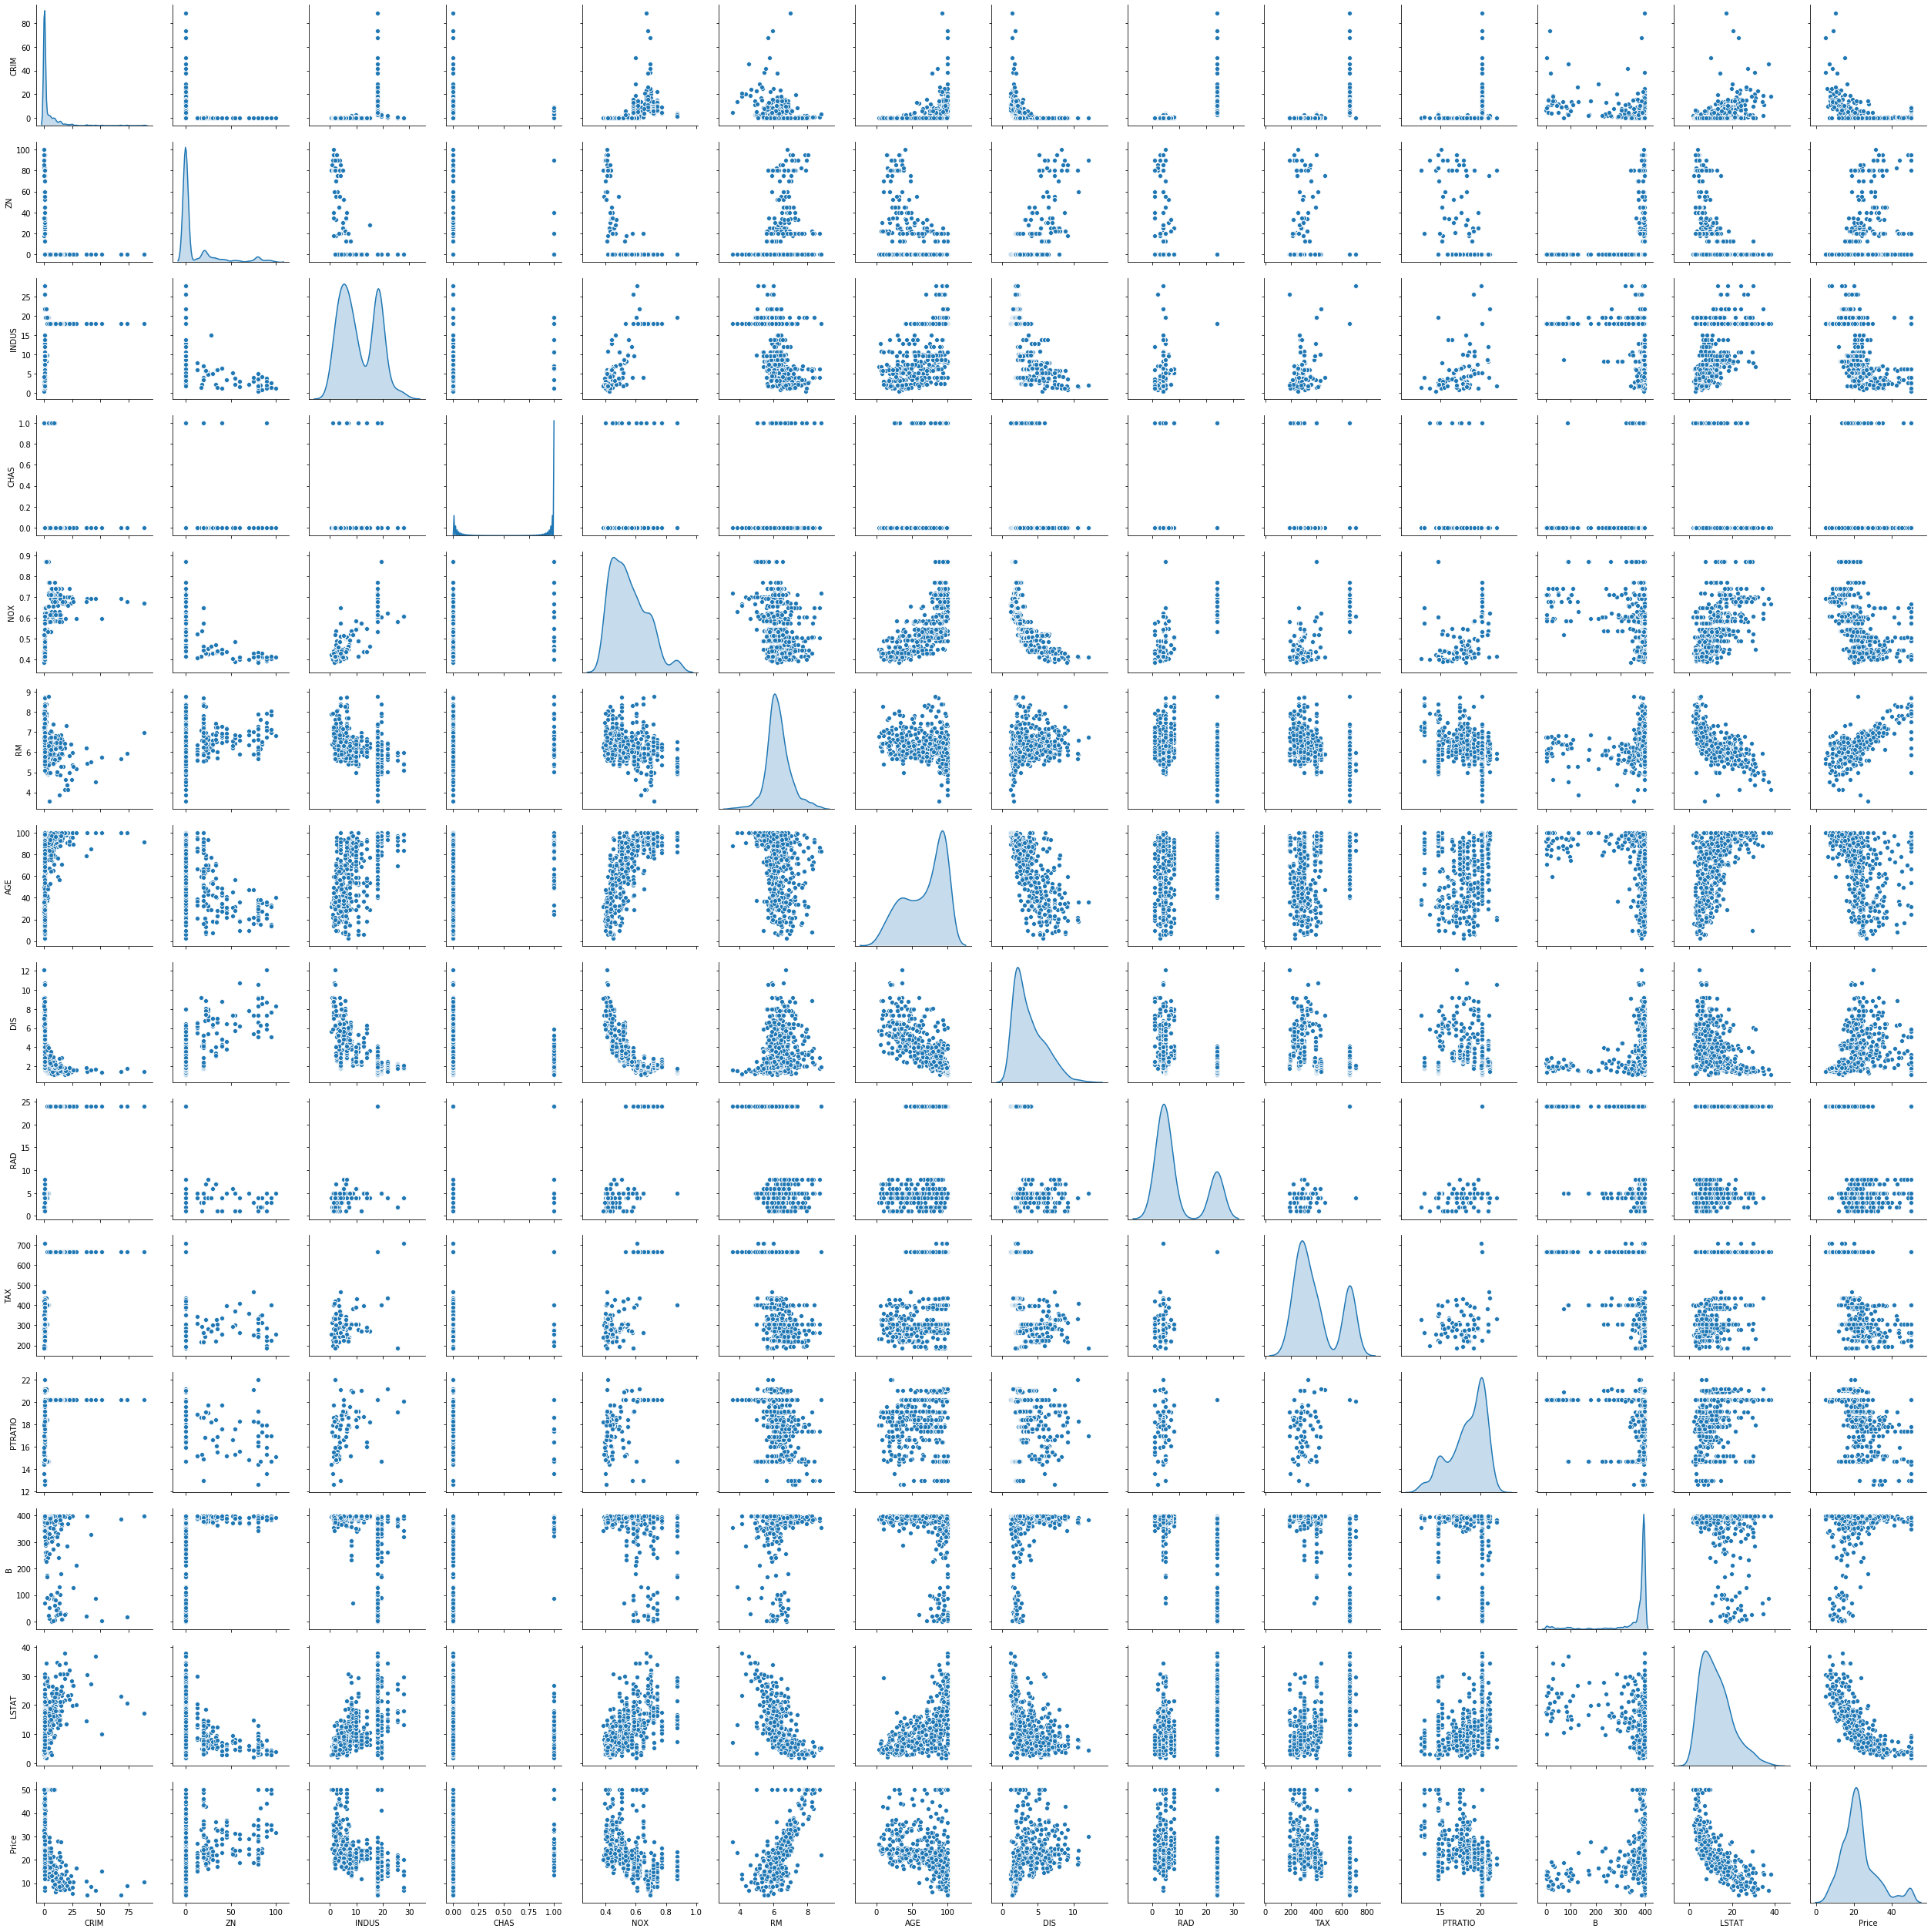

In [6]:
sns.pairplot(df,diag_kind = 'kde')
plt.show()

In [7]:
from scipy.stats import levene

In [10]:
for cols in df.columns[:-1]:
    print(cols,levene(df['Price'],df[cols])[1])

CRIM 5.058441209116198e-10
ZN 8.133651361911733e-06
INDUS 0.1457225947720034
CHAS 7.087575216458403e-88
NOX 1.9551701808981249e-87
RM 4.570687431842767e-78
AGE 2.4747442349124064e-82
DIS 1.2366032641993388e-52
RAD 0.15775679338003074
TAX 6.548989933002059e-93
PTRATIO 4.3496792236604184e-51
B 1.9614461422071214e-15
LSTAT 0.012493298329754982


In [11]:
from scipy.stats import stats

In [13]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [12]:
ch_gb = df.groupby('CHAS')

In [14]:
ch_gb0 = ch_gb.get_group(0)
ch_gb1 = ch_gb.get_group(1)

In [15]:
stats.ttest_ind(ch_gb0['Price'],ch_gb1['Price'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Scikit Learn Method**

In [16]:
x = df.drop('Price',axis = 1)
y = df['Price']

In [17]:
LR = LinearRegression()
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
LR.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [19]:
LR.intercept_

36.459488385090005

In [20]:
LR.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

**Statsmodels ols method 1:**

In [21]:
ml = smf.ols('Price ~ CRIM + ZN+ INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',df).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 12 Jun 2020   Prob (F-statistic):          6.72e-135
Time:                        21:49:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note:**
    
This method is very cumbersome and we have write down each and every variable we want to include in the model.This approach is similar to 'R_Language'.This method is a good manual method as we can add a one variable at a time and see the impact.However as the variable keep on increasing it can be get cumbersome for that reason second method (Statsmodels OLS with Constant) Recommended.  

###**StatsModels OLS method2 (add constant)**

In [22]:
x = df.drop('Price',axis = 1)
y = df['Price']

In [23]:
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 12 Jun 2020   Prob (F-statistic):          6.72e-135
Time:                        21:58:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation:
    
According to summary INDUS and AGE have p_vlaue < 0.05 so,these features need to be removed and run the model again.    

**Backward Elimination**

We can automate the Process and see the variables which have P_value < 0.05

In [29]:
#Backward Elimination

cols = list(x.columns)                                         # Putting all the columns in a list
pmax = 1                                                       # Setting the Highest value for p-value as 1
while (len(cols)>0):                                           # While length of column > 0 the loop will run
    p= []                                                      # p is an empty list
    X = x[cols]                                                # We are taking all the columns in x
    xc = sm.add_constant(X)                                    # We are adding the constant to X
    model = sm.OLS(y,xc).fit()                                 # Fitted the OLS model with all the featues
    p = pd.Series(model.pvalues.values[1:],index = cols)       # Creating a series with all the p-values (values) ([1:0] because to not include the p-value of constant) with column names as indexes
    pmax = max(p)                                              # pmax will store the value with the maximum p-values of all the p-values
    feature_with_p_max = p.idxmax()                            # p.idxmax() will return the index of the corresponding value
    if(pmax>0.05):                                             # if p-value stored in pmax > 0.05
        cols.remove(feature_with_p_max)                        # that column is removed (if p-value > 0.05), now len of column is reduced by 1 the whole process will repeat
    else:                                                      # It will keep on doing till the highest p-value is less than 0.05
        break                                                  # Once it found the nth highest one with the p-value < 0.05 automatically others after that have p-value < 0.05 and loop breaks
selected_features_BE = cols                                    # Collecting all features which have p-value < 0.05
print(selected_features_BE)                                    # Printing all the features it collected in selected_features_BE 

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [31]:
print(len(cols))

# Backward elimination has already removed the insignificant features and stored them in cols,df['cols'] will contain only the 
# Relevent features and data

11


# Train_Test_Split (TTs)    Vs    KFold_Cross_validation(CV)

TTS: This is a Point estimate,if you do the process and calculate RMSE you will get one_value
    
CV: This is a Range Estimate,it will do Multiple TTS and gives RMSE as a Range (Preferred method) 
    
Train-Test-Split(Point Estimate)    

In [34]:
x_final = df[cols]
y = df['Price']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_final,y,test_size = 0.3,random_state = 0)

In [38]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_pred = LR.predict(x_test)

In [42]:
mse = metrics.mean_squared_error(y_test,y_pred)
mse

27.046570095926935

In [43]:
rmse = np.sqrt(mse)
rmse

5.2006317016230765

RMSE: 5.2006317016230765
    
Using train_test_split which is Point Estimate,the model predicted RMSE of 5.20.The model is predicting an average error of 5.20,since the target variable is given in scale of 1000,that means the model is predicting with the average error of 5.20*1000=$5200    

**KFold Cross Validation with n_splits = 5**

In [44]:
x_final = df[cols]
y = df['Price']

In [45]:
from sklearn.model_selection import KFold

In [55]:
kf = KFold(n_splits = 5,shuffle = True,random_state = 0)
for model,name in zip([LR],['MVLR']):
    rmse = []
    for train,test in kf.split(x_final,y):
        x_train,x_test = x_final.iloc[train,:],x_final.iloc[test,:]
        y_train,y_test = y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        y_predict = model.predict(x_test)
        rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
    print(rmse)

[5.781366335656907, 4.285510956964737, 4.60568431079431, 5.401332289086716, 4.069307989432029]


In [56]:
np.mean(rmse)

4.82864037638694

Mean of 5 RMSE calculated in the five folds is 4.828 is more accuarate than 5.20 is calculated in train-test-split

**Regularization**

In [61]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [62]:
m1 = LinearRegression()
m2 = Ridge(alpha = 0.05,normalize = True)
m3 = Lasso(alpha = 0.05,normalize = True)
# m4 = ElasticNet(alpha = 0.01,l1_ratio = 0.919,normalize = True)

In [68]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
for model,name in zip([m1,m2,m3],['MVLR','Ridge','Lasso']):
    rmse = []
    for train,test in kf.split(x_final,y):
        x_train,x_test = x_final.iloc[train,:],x_final.iloc[test,:]
        y_train,y_test = y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        y_predict = model.predict(x_test)
        rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
    print(rmse)
    print('Cross_Validated_RMSE_Score: %0.03f (+/- %0.5f) [%s]' %
             (np.mean(rmse),np.var(rmse,ddof = 1),name))

[5.781366335656907, 4.285510956964737, 4.60568431079431, 5.401332289086716, 4.069307989432029]
Cross_Validated_RMSE_Score: 4.829 (+/- 0.53924) [MVLR]
[5.900002341457296, 4.197163228547382, 4.549720833491406, 5.473805477494465, 4.07514970060382]
Cross_Validated_RMSE_Score: 4.839 (+/- 0.65195) [Ridge]
[6.336444253093296, 4.771187962238036, 4.680820783468405, 6.054553995790453, 5.23855821107648]
Cross_Validated_RMSE_Score: 5.416 (+/- 0.56068) [Lasso]


MVLR: BE = 4.829 , VE = 0.539
    
Ridge(alpha = 0.05): BE = 4.839 ,VE = 0.65195
  
Lasso(alpha = 0.01): BE = 5.416 , VE = 0.560

In [69]:
rmse_lr = np.array([5.781366335656907, 4.285510956964737, 4.60568431079431, 5.401332289086716, 4.069307989432029])
rmse_ridge = np.array([5.900002341457296, 4.197163228547382, 4.549720833491406, 5.473805477494465, 4.07514970060382])
rmse_lasso = np.array([6.336444253093296, 4.771187962238036, 4.680820783468405, 6.054553995790453, 5.23855821107648])

In [70]:
print('LR BE:' , rmse_lr.mean(), 'LR VE:', rmse_lr.var(ddof = 1))

LR BE: 4.82864037638694 LR VE: 0.5392368569109235


In [71]:
print('Ridge BE:', rmse_ridge.mean(),'Ridge VE:',rmse_ridge.var(ddof = 1))

Ridge BE: 4.839168316318874 Ridge VE: 0.6519519946087963


In [72]:
print('Lasso BE:',rmse_lasso.mean(),'Lasso VE:',rmse_lasso.var(ddof = 1))

Lasso BE: 5.416313041133334 Lasso VE: 0.5606812428844496


Run KFold with MVLR,Ridge,Lasso models

In [73]:
kf = KFold(n_splits = 5, shuffle = True, random_state=0)
for model, name in zip([m1,m2,m3], ['MVLR', 'Ridge', 'Lasso']):
  rmse = []
  for train,test in kf.split(x_final,y):
    x_train, x_test = x_final.iloc[train,:], x_final.iloc[test,:]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model.fit(x_train,y_train)
    print(model.coef_)
    y_predict = model.predict(x_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
  print(rmse)

[-1.19265889e-01  4.51412980e-02  2.34282671e+00 -1.62978884e+01
  3.68549285e+00 -1.37731203e+00  2.43212756e-01 -1.08465147e-02
 -1.04568509e+00  8.03588534e-03 -4.96639689e-01]
[-1.03102190e-01  5.36299477e-02  2.84184372e+00 -1.86873163e+01
  3.50848063e+00 -1.66421607e+00  3.07158134e-01 -1.11096926e-02
 -9.67555121e-01  7.76653207e-03 -5.67978459e-01]
[-1.18646711e-01  3.69036523e-02  4.07677646e+00 -1.72184735e+01
  4.28852639e+00 -1.48933762e+00  3.18776434e-01 -1.15005455e-02
 -9.37384937e-01  1.16096832e-02 -5.12612986e-01]
[-7.32554972e-02  4.85575609e-02  2.51121193e+00 -1.65579354e+01
  4.30357172e+00 -1.45887599e+00  2.67283552e-01 -1.09615756e-02
 -8.96559618e-01  1.10079878e-02 -4.85790441e-01]
[-1.10543050e-01  4.08566139e-02  1.96072493e+00 -1.73073657e+01
  3.30668724e+00 -1.41212794e+00  3.63755623e-01 -1.51427373e-02
 -8.87315770e-01  8.82807704e-03 -5.46656958e-01]
[5.781366335656907, 4.285510956964737, 4.60568431079431, 5.401332289086716, 4.069307989432029]
[-1.0

In [74]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


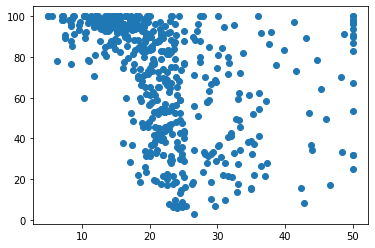

In [76]:
plt.scatter(df['Price'],df['AGE'])
plt.show()

In [77]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [78]:
a = np.array([5.36,2.81,1.26,12.48,2.43])

In [79]:
a.var(ddof = 1)

20.34537

In [80]:
x_train

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,0.0,0.458,6.430,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,0.0,0.524,6.012,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,0.0,0.524,6.172,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,0.0,0.524,5.631,6.0821,5.0,311.0,15.2,386.63,29.93
10,0.22489,12.5,0.0,0.524,6.377,6.3467,5.0,311.0,15.2,392.52,20.45


**Quadratic Regression Model**

Degree = 2

first try with one variable (LSTAT):
    
Y = B0 + B1*(LSTAT) + B2*(LSTAT)^2    
    

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
X = df[['LSTAT']]  # LSTAT Means Lower status of population (density)

In [83]:
# Quadratic Regression with only one feature

qr = PolynomialFeatures(degree = 2)
x_qr = qr.fit_transform(X)

In [84]:
type(x_qr)

numpy.ndarray

In [86]:
x_qr_df = pd.DataFrame(x_qr)
x_qr_df.head()

,0,1,2
0,1.0,4.98,24.8004
1,1.0,9.14,83.5396
2,1.0,4.03,16.2409
3,1.0,2.94,8.6436
4,1.0,5.33,28.4089


Column 0 = LSTAT^0

Column 1 = LSTAT^1

Column 2 = LSTAT^2

In [89]:
x_qr_df = x_qr_df.drop(0,axis = 1)

In [90]:
x_qr_df.head()

,1,2
0,4.98,24.8004
1,9.14,83.5396
2,4.03,16.2409
3,2.94,8.6436
4,5.33,28.4089


In [98]:
kf = KFold(n_splits = 5 , shuffle = True, random_state = 0)
for model,name in zip([LR],['Quadratic Regression']):
    rmse = []
    for train,test in kf.split(x_qr_df,y):
        x_train,x_test = x_qr_df.iloc[train,:],x_qr_df.iloc[test,:]
        y_train,y_test = y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
        
    print(rmse)    

[6.2327256206018875, 5.16920694548939, 4.8134483167541395, 5.322775656375261, 5.959152434168141]


In [99]:
print('Bias Error of Quadratic Regression:',np.mean(rmse))
print('Variance Error of Quadratic Regression:',np.var(rmse,ddof = 1))

Bias Error of Quadratic Regression: 5.499461794677764
Variance Error of Quadratic Regression: 0.33997301780437733


MVLR: BE = 4.829 , VE = 0.539
    
Ridge(alpha = 0.05): BE = 4.839 ,VE = 0.65195
  
Lasso(alpha = 0.01): BE = 5.416 , VE = 0.560
    
Quadratic Regression(only LSTAT) : BE:5.49 , VE:0.339    

**Conclusion:** Up to Models we ran so far, we can conclude that Multi_Variate LinearRegression(MVLR) model is best in terms of Bias Error and in terms of Varience Error also.if you observe the Bias error for MVLR is 4.8 and Quad Regression(only one Variable LSTAT) has increased to 5.49 because of model is being trained with only one variable

**Polynomial Features**

degree = 3 or above

In [101]:
# LSTAT with 3rd order

X = df[['LSTAT']]

# Equation: Y = B0+B1*(LSTAT)+B2*(LSTAT)^2+B3(LSTAT)^3
# Polynomial Regression with only one Feature

pr = PolynomialFeatures(degree = 3)
x_pr = pr.fit_transform(X)

In [102]:
type(x_pr)

numpy.ndarray

In [103]:
x_pr_df = pd.DataFrame(x_pr)
x_pr_df.head()

,0,1,2,3
0,1.0,4.98,24.8004,123.505992
1,1.0,9.14,83.5396,763.551944
2,1.0,4.03,16.2409,65.450827
3,1.0,2.94,8.6436,25.412184
4,1.0,5.33,28.4089,151.419437


In [105]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
for model, name in zip([LR],['Polynomial_Regression']):
    rmse = []
    for train,test in kf.split(x_pr_df,y):
        x_train,x_test = x_pr_df.iloc[train,:],x_pr_df.iloc[test,:]
        y_train,y_test = y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        y_predict = model.predict(x_test)
        rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
    print(rmse) 
    print('Cross_Validated_RMSE_Score: %0.03f (+/- %0.5f) [%s]' %
         (np.mean(rmse),np.var(rmse,ddof = 1),name))

[6.101167287366561, 5.086068308653231, 4.727963096070287, 5.039599911556022, 5.899731461222393]
Cross_Validated_RMSE_Score: 5.371 (+/- 0.35430) [Polynomial_Regression]


As you did PolyRegression with  degree = 3 i.e 3rd order bias error has decreased but the variance error has increased. As you increase the order the bias error will decrease and variance error will keep on increasing.

In [106]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


From the Correlation Matrix we know the hihgest Correlated variable with target feature(Price) is LSTAT and second most correlated variable is PTRATIO. Now Let's do the analysis with LSTAT(Percentage of Lower status of the Population) and PTRATIO is (pupil-Teacher ratio is school by town).

**Quadratic and Polynomial Regression with Multiple Variables**

2-Variables = LSTAT AND PTRATIO

Equation: Y = B0 + B1*(LSTAT)^1 + B2*(LSTAT)^2 + B3*(PTRATIO) + B4*(PTRATIO)^2

Equation(power 3): Y = B0 + B1*(LSTAT)^1 + B2(LSTAT)^2 + B3*(LSTAT)^3 + B4*(PTRATIO) + B5*(PTRAIO)^2 + B6*(PTRATIO)^3    

In [107]:
# Quadradtic Regression with 2 variables

X = df[['LSTAT','PTRATIO']]

In [109]:
qr = PolynomialFeatures(degree = 2)
x_qr = qr.fit_transform(X)

In [110]:
x_qr_df = pd.DataFrame(x_qr)
x_qr_df.head()

,0,1,2,3,4,5
0,1.0,4.98,15.3,24.8004,76.194,234.09
1,1.0,9.14,17.8,83.5396,162.692,316.84
2,1.0,4.03,17.8,16.2409,71.734,316.84
3,1.0,2.94,18.7,8.6436,54.978,349.69
4,1.0,5.33,18.7,28.4089,99.671,349.69


In [111]:
x_qr_df = x_qr_df.drop(0,axis = 1)

In [112]:
kf = KFold(n_splits = 5, shuffle = True, random_state=0)
for model, name in zip([LR], ['Quadractic_Regression']):
  rmse = []
  for train,test in kf.split(x_qr_df,y):
    x_train, x_test = x_qr_df.iloc[train,:], x_qr_df.iloc[test,:]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
  print(rmse)

[6.675288365946438, 4.688066110224669, 4.383408040448983, 5.147355270569333, 5.224241000590944]


In [113]:
print('Bias Error of Quadratic Regression:',np.mean(rmse))
print('Variance Error of Quadratic Regression:',np.var(rmse,ddof = 1))

Bias Error of Quadratic Regression: 5.223671757556073
Variance Error of Quadratic Regression: 0.776482957929573


Bias error decrease at the COST of variance error. Variance was 0.354 and now it is 0.776. That it not a Good Tradeoff which means we should stop making the model more complex.This proves that LSTAT(which is percent of Lower status individual) is very strong attribute to predict the Price.This also tells us that individuals sampled in this dataset that price is highly sensitive to LSTAT and adding the other factor will disturbing the model.

**Which Model to Pick?**

If we look at the model we have built so far:
    
* MVLR has Low Bias Error(BE) and Quad(Single Variable LSTAT) has Low Variance Error(VE)
* we compute the Differnce [(MAX - MIN)/MAX] to determine which is best.

**MVLR: BE (4.829) and VE (0.5329)**
    
**QUAD(LSTAT): BE (5.49) and VE(0.339)**
    
Compute Bias Error Difference: (5.49-4.82)/5.49 = 0.1204 = 12.04% 
    
Compute Variance Error Difference: (0.5329-0.339)/0.5329 = 0.37 = 37%
    
*Since the Differnce in VE(37%) > BE(12%), we can conclude that we are going in favour of a less variance error and pick Quadratic Regression with LSTAT variable as a good pick for the model, In other words,we are willing to forgo 12% of Bias Error for decreasing variance error by 37% which is being achived by the Quadratic Model.    